In [2]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
import astropy.constants as const
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, gaussian
import cmcrameri.cm as cmcm
from scipy import signal

In [3]:
file_Doppler = scipy.io.readsav("../../save/spectrum/noti_chianti10/spectrum_pch_2063_eis_noinstr_fe8_fe12_doppler.sav")
file_NoDoppler = scipy.io.readsav("../../save/spectrum/noti_chianti10/spectrum_pch_2063_eis_noinstr_fe8_fe12_nodoppler.sav")

In [4]:
file_Doppler["w"].shape

(41, 1, 700)

In [5]:
wvl = file_Doppler["x"][0,0,0,:]
wvl_186 = wvl[20:350]
wvl_192 = wvl[370:]
wvl_186_inst = np.average(wvl_186.reshape(-1,22),axis=1)
wvl_192_inst = np.average(wvl_192.reshape(-1,22),axis=1)

FeVIII_186_Doppler = np.average(file_Doppler["w"][6:9,0,20:350],axis=0)
FeVIII_186_NoDoppler = np.average(file_NoDoppler["w"][6:9,0,20:350],axis=0)
FeXII_192_Doppler = np.average(file_Doppler["w"][6:9,0,370:],axis=0)
FeXII_192_NoDoppler = np.average(file_NoDoppler["w"][6:9,0,370:],axis=0)

EIS_instru_filter = gaussian(np.linspace(0,1,1001),0.5,1,0.07)
EIS_instru_filter = EIS_instru_filter/np.sum(EIS_instru_filter)
FeVIII_186_Doppler_inst = signal.convolve(FeVIII_186_Doppler,EIS_instru_filter,mode="same")
FeVIII_186_Doppler_inst = np.average(FeVIII_186_Doppler_inst.reshape(-1,22),axis=1)
FeVIII_186_NoDoppler_inst = signal.convolve(FeVIII_186_NoDoppler,EIS_instru_filter,mode="same")
FeVIII_186_NoDoppler_inst = np.average(FeVIII_186_NoDoppler_inst.reshape(-1,22),axis=1)
FeXII_192_Doppler_inst = signal.convolve(FeXII_192_Doppler,EIS_instru_filter,mode="same")
FeXII_192_Doppler_inst = np.average(FeXII_192_Doppler_inst.reshape(-1,22),axis=1)
FeXII_192_NoDoppler_inst = signal.convolve(FeXII_192_NoDoppler,EIS_instru_filter,mode="same")
FeXII_192_NoDoppler_inst = np.average(FeXII_192_NoDoppler_inst.reshape(-1,22),axis=1)

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:203: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{viii} 186\\,\\mbox{\\AA}, Doppler}'}, ylabel='\\textbf{Intensity} $\\boldsymbol{I_\\lambda}$\\,\\textbf{[\\si{erg.s^{-1}.cm^{-2}.\\angstrom^{-1}.sr^{-1}}]}'>

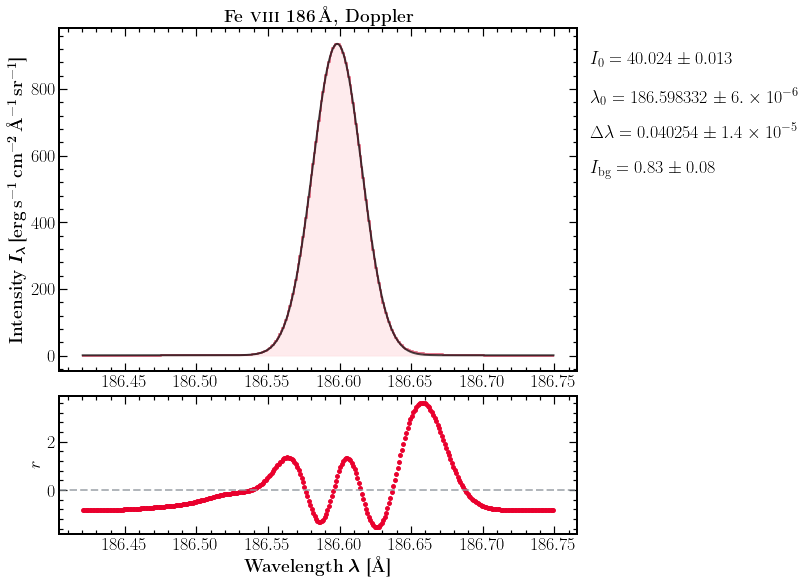

In [6]:
FeVIII_186_Doppler_model = SpectrumFitSingle(data=FeVIII_186_Doppler,wvl=wvl_186,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[186.59],
                                      int_max_init=[1000],fwhm_init=[0.03])
# FeX_174_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_186_Doppler_model.run_lse()
FeVIII_186_Doppler_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 186\,\mbox{\AA}, Doppler}",
                                 xlabel=r"\textbf{Wavelength} $\boldsymbol\lambda$ \textbf{[\si{\angstrom}]}",
                              ylabel=r"\textbf{Intensity} $\boldsymbol{I_\lambda}$\,\textbf{[\si{erg.s^{-1}.cm^{-2}.\angstrom^{-1}.sr^{-1}}]}")

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:203: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{viii} 186\\,\\mbox{\\AA}, NoDoppler}'}, ylabel='\\textbf{Intensity} $\\boldsymbol{I_\\lambda}$\\,\\textbf{[\\si{erg.s^{-1}.cm^{-2}.\\angstrom^{-1}.sr^{-1}}]}'>

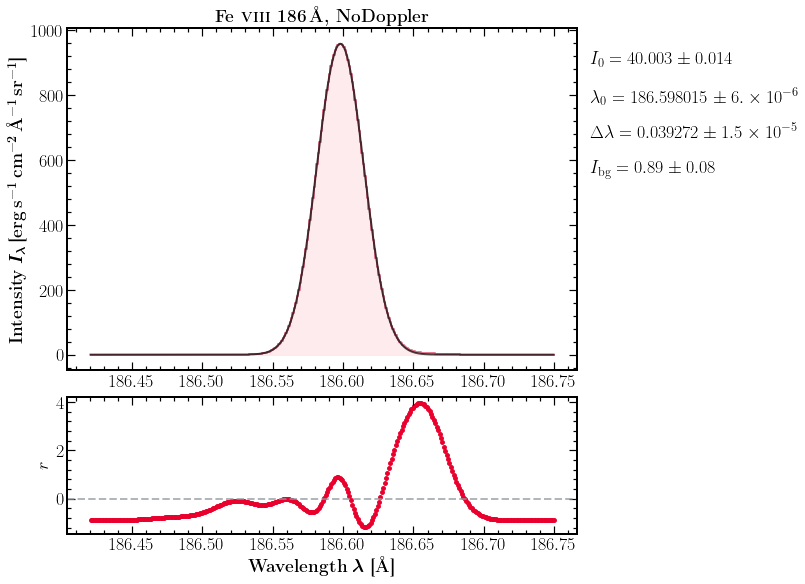

In [7]:
FeVIII_186_NoDoppler_model = SpectrumFitSingle(data=FeVIII_186_NoDoppler,wvl=wvl_186,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[186.59],
                                      int_max_init=[1000],fwhm_init=[0.03])
# FeX_174_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_186_NoDoppler_model.run_lse()
FeVIII_186_NoDoppler_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 186\,\mbox{\AA}, NoDoppler}",
                                 xlabel=r"\textbf{Wavelength} $\boldsymbol\lambda$ \textbf{[\si{\angstrom}]}",
                              ylabel=r"\textbf{Intensity} $\boldsymbol{I_\lambda}$\,\textbf{[\si{erg.s^{-1}.cm^{-2}.\angstrom^{-1}.sr^{-1}}]}")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{viii} 192\\,\\mbox{\\AA}, Doppler}'}, ylabel='\\textbf{Intensity} $\\boldsymbol{I_\\lambda}$\\,\\textbf{[\\si{erg.s^{-1}.cm^{-2}.\\angstrom^{-1}.sr^{-1}}]}'>

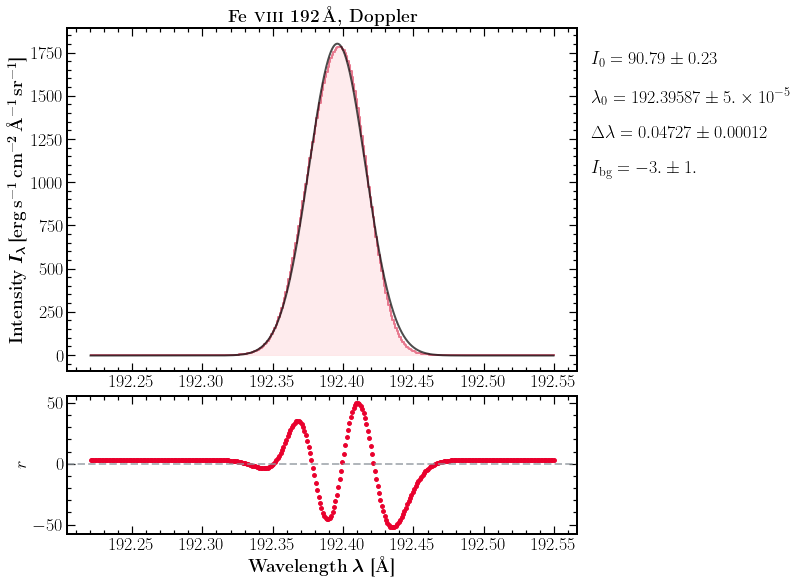

In [8]:
FeXII_192_Doppler_model = SpectrumFitSingle(data=FeXII_192_Doppler,wvl=wvl_192,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[192.35],
                                      int_max_init=[1000],fwhm_init=[0.03])
# FeX_174_fit_model.plot(plot_fit=False,plot_params=False)
FeXII_192_Doppler_model.run_lse()
FeXII_192_Doppler_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 192\,\mbox{\AA}, Doppler}",
                                 xlabel=r"\textbf{Wavelength} $\boldsymbol\lambda$ \textbf{[\si{\angstrom}]}",
                              ylabel=r"\textbf{Intensity} $\boldsymbol{I_\lambda}$\,\textbf{[\si{erg.s^{-1}.cm^{-2}.\angstrom^{-1}.sr^{-1}}]}")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{xii} 192\\,\\mbox{\\AA}, NoDoppler}'}, ylabel='\\textbf{Intensity} $\\boldsymbol{I_\\lambda}$\\,\\textbf{[\\si{erg.s^{-1}.cm^{-2}.\\angstrom^{-1}.sr^{-1}}]}'>

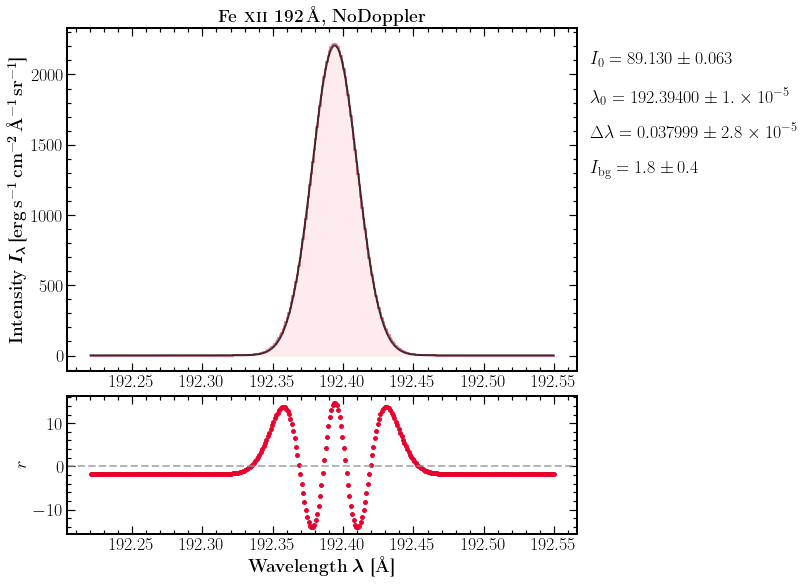

In [9]:
FeXII_192_NoDoppler_model = SpectrumFitSingle(data=FeXII_192_NoDoppler,wvl=wvl_192,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[192.35],
                                      int_max_init=[1000],fwhm_init=[0.03])
# FeX_174_fit_model.plot(plot_fit=False,plot_params=False)
FeXII_192_NoDoppler_model.run_lse()
FeXII_192_NoDoppler_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 192\,\mbox{\AA}, NoDoppler}",
                                 xlabel=r"\textbf{Wavelength} $\boldsymbol\lambda$ \textbf{[\si{\angstrom}]}",
                              ylabel=r"\textbf{Intensity} $\boldsymbol{I_\lambda}$\,\textbf{[\si{erg.s^{-1}.cm^{-2}.\angstrom^{-1}.sr^{-1}}]}")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{viii} 186\\,\\mbox{\\AA}, Doppler, Inst}'}, ylabel='\\textbf{Intensity} $\\boldsymbol{I_\\lambda}$\\,\\textbf{[\\si{erg.s^{-1}.cm^{-2}.\\angstrom^{-1}.sr^{-1}}]}'>

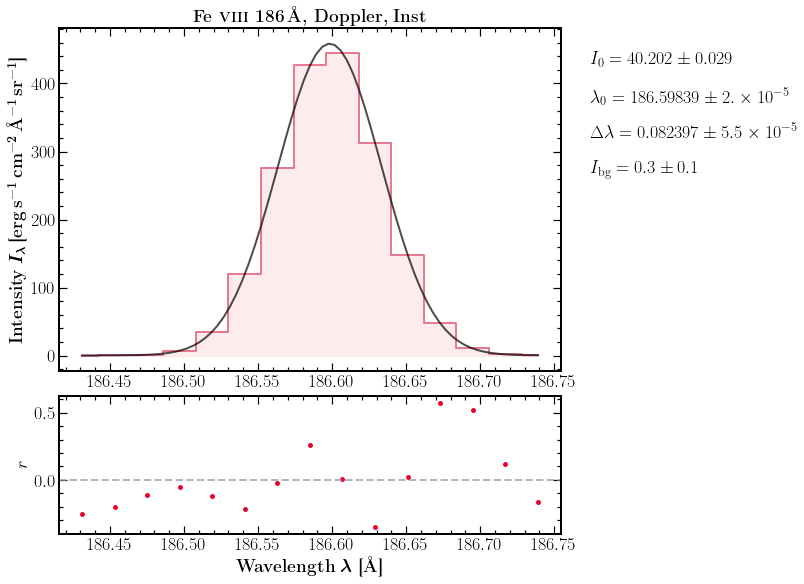

In [10]:
FeVIII_186_Doppler_inst_model = SpectrumFitSingle(data=FeVIII_186_Doppler_inst,wvl=wvl_186_inst,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[186.59],
                                      int_max_init=[1000],fwhm_init=[0.03])
# FeX_174_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_186_Doppler_inst_model.run_lse()
FeVIII_186_Doppler_inst_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 186\,\mbox{\AA}, Doppler, Inst}",
                                 xlabel=r"\textbf{Wavelength} $\boldsymbol\lambda$ \textbf{[\si{\angstrom}]}",
                              ylabel=r"\textbf{Intensity} $\boldsymbol{I_\lambda}$\,\textbf{[\si{erg.s^{-1}.cm^{-2}.\angstrom^{-1}.sr^{-1}}]}")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{viii} 186\\,\\mbox{\\AA}, NoDoppler, Inst}'}, ylabel='\\textbf{Intensity} $\\boldsymbol{I_\\lambda}$\\,\\textbf{[\\si{erg.s^{-1}.cm^{-2}.\\angstrom^{-1}.sr^{-1}}]}'>

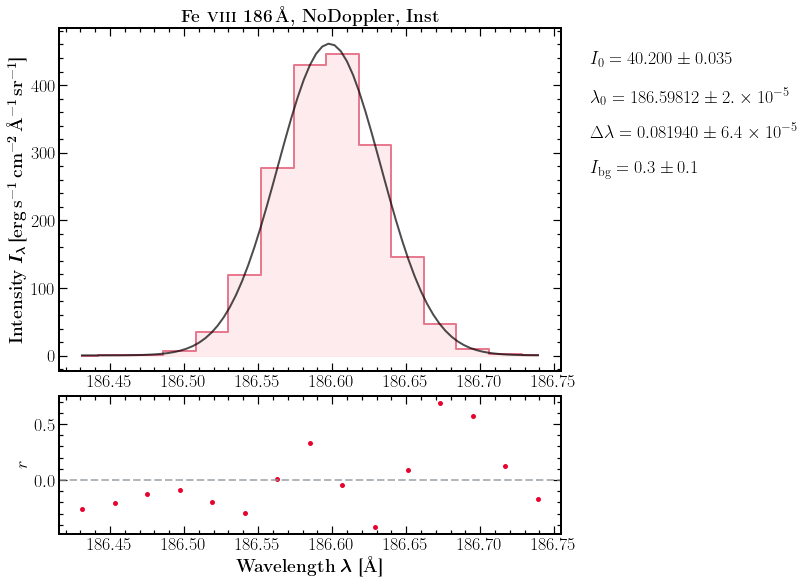

In [11]:
FeVIII_186_NoDoppler_inst_model = SpectrumFitSingle(data=FeVIII_186_NoDoppler_inst,wvl=wvl_186_inst,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[186.59],
                                      int_max_init=[1000],fwhm_init=[0.03])
# FeX_174_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_186_NoDoppler_inst_model.run_lse()
FeVIII_186_NoDoppler_inst_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 186\,\mbox{\AA}, NoDoppler, Inst}",
                                 xlabel=r"\textbf{Wavelength} $\boldsymbol\lambda$ \textbf{[\si{\angstrom}]}",
                              ylabel=r"\textbf{Intensity} $\boldsymbol{I_\lambda}$\,\textbf{[\si{erg.s^{-1}.cm^{-2}.\angstrom^{-1}.sr^{-1}}]}")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{viii} 192\\,\\mbox{\\AA}, Doppler, Inst}'}, ylabel='\\textbf{Intensity} $\\boldsymbol{I_\\lambda}$\\,\\textbf{[\\si{erg.s^{-1}.cm^{-2}.\\angstrom^{-1}.sr^{-1}}]}'>

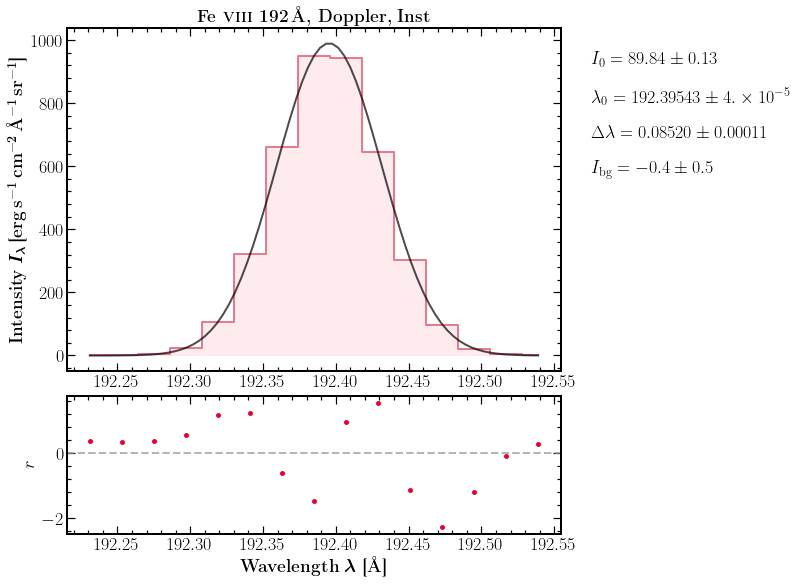

In [12]:
FeXII_192_Doppler_inst_model = SpectrumFitSingle(data=FeXII_192_Doppler_inst,wvl=wvl_192_inst,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[192.35],
                                      int_max_init=[1000],fwhm_init=[0.03])
# FeX_174_fit_model.plot(plot_fit=False,plot_params=False)
FeXII_192_Doppler_inst_model.run_lse()
FeXII_192_Doppler_inst_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 192\,\mbox{\AA}, Doppler, Inst}",
                                 xlabel=r"\textbf{Wavelength} $\boldsymbol\lambda$ \textbf{[\si{\angstrom}]}",
                              ylabel=r"\textbf{Intensity} $\boldsymbol{I_\lambda}$\,\textbf{[\si{erg.s^{-1}.cm^{-2}.\angstrom^{-1}.sr^{-1}}]}")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{viii} 192\\,\\mbox{\\AA}, NoDoppler, Inst}'}, ylabel='\\textbf{Intensity} $\\boldsymbol{I_\\lambda}$\\,\\textbf{[\\si{erg.s^{-1}.cm^{-2}.\\angstrom^{-1}.sr^{-1}}]}'>

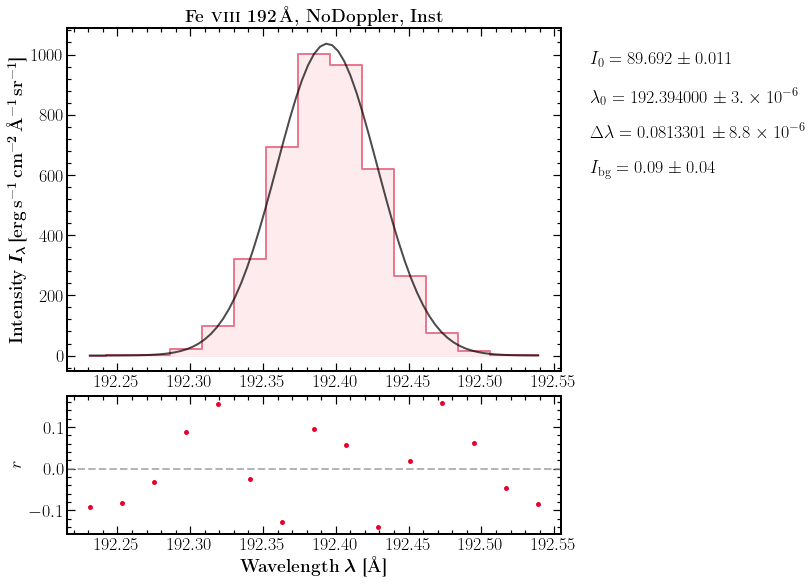

In [13]:
FeXII_192_NoDoppler_inst_model = SpectrumFitSingle(data=FeXII_192_NoDoppler_inst,wvl=wvl_192_inst,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[192.35],
                                      int_max_init=[1000],fwhm_init=[0.03])
# FeX_174_fit_model.plot(plot_fit=False,plot_params=False)
FeXII_192_NoDoppler_inst_model.run_lse()
FeXII_192_NoDoppler_inst_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 192\,\mbox{\AA}, NoDoppler, Inst}",
                                 xlabel=r"\textbf{Wavelength} $\boldsymbol\lambda$ \textbf{[\si{\angstrom}]}",
                              ylabel=r"\textbf{Intensity} $\boldsymbol{I_\lambda}$\,\textbf{[\si{erg.s^{-1}.cm^{-2}.\angstrom^{-1}.sr^{-1}}]}")

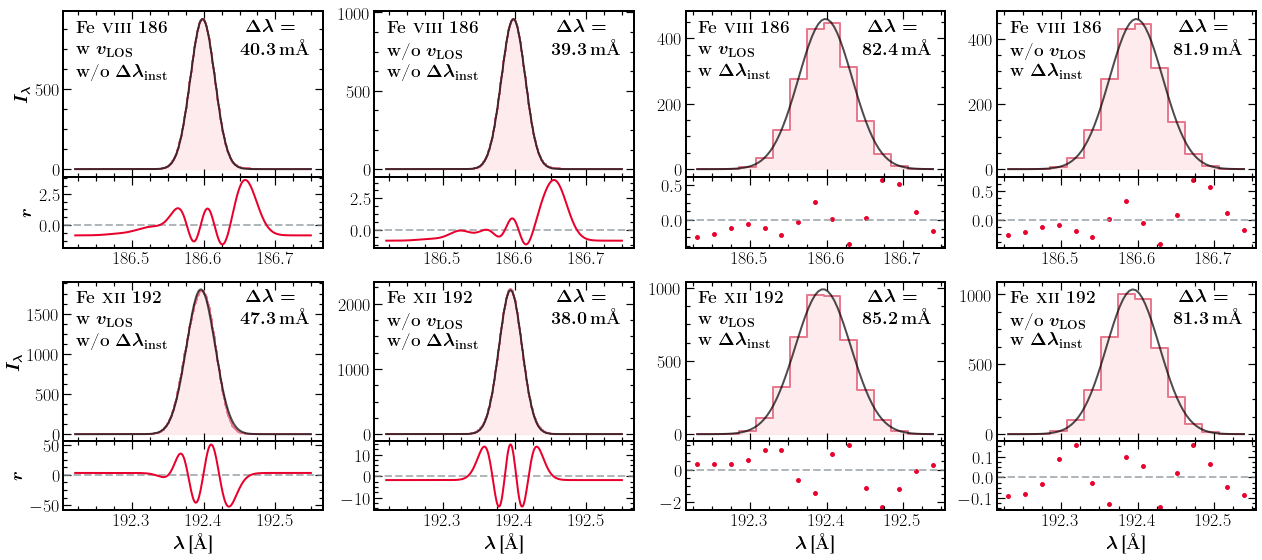

In [145]:
def plot_panel(ax_fit,ax_res,fit_model=None,color_style="Red",
            inst=True,doppler=True,name=None):

    if color_style == "Red":
        colors = ["#E87A90","#FEDFE1","black","#E9002D","#DBD0D0"]
    elif color_style == "Green":
        colors = ["#00896C","#A8D8B9","black","#33A6B8","#DBD0D0"]
    elif color_style == "Yellow":
        colors = ["#FFBA84","#FAD689","black","#FC9F4D","#DBD0D0"]
    elif color_style == "Blue":
        colors = ["#3A8FB7","#A5DEE4","black","#58B2DC","#DBD0D0"]
    elif color_style == "Purple":
        colors = ["#8F77B5","#B28FCE","black","#6A4C9C","#DBD0D0"]

    line_wvl_plot = fit_model.line_wvl_fit
    int_total_plot = fit_model.int_total_fit
    fwhm_plot = fit_model.fwhm_fit
    int_cont_plot = fit_model.int_cont_fit
    line_wvl_err_plot = fit_model.line_wvl_err
    int_total_err_plot = fit_model.int_total_err
    fwhm_err_plot = fit_model.fwhm_err
    int_cont_err_plot = fit_model.int_cont_err

    fwhm_text_fmt = r'$\boldsymbol{{{:.1f}}}$\,\textbf{{m\mbox{{\AA}}}}'

    p_fit = np.concatenate((line_wvl_plot,int_total_plot,fwhm_plot,
                            int_cont_plot),axis=None)
    spec_fit = fit_model.multi_gaussian_diff_width(fit_model.wvl_plot,*p_fit) 
    res_fit = fit_model.data_tofit - fit_model.multi_gaussian_diff_width(fit_model.wvl_tofit,*p_fit)  
    

    ln1, = ax_fit.step(fit_model.wvl,fit_model.data,where="mid",color=colors[0],
    label = r"$I_{\rm obs}$",lw=2,zorder=15)

    ax_fit.fill_between(fit_model.wvl,np.ones_like(fit_model.wvl)*np.min(fit_model.data),fit_model.data,
                        step='mid',color=colors[1],alpha=0.6)

    ln2, = ax_fit.plot(fit_model.wvl_plot,spec_fit,color=colors[2],ls="-",label = r"$I_{\rm fit}$",lw=2,
                            zorder=16,alpha=0.7)

    ax_res.axhline(0,ls="--",lw=2,color="#91989F",alpha=0.7) 
    
    if inst is True:
        ax_res.scatter(fit_model.wvl_tofit,res_fit,marker="o",s=15,color=colors[3])
    else:
        ax_res.plot(fit_model.wvl_tofit,res_fit,lw=2,color=colors[3])


    ax_fit.text(0.05,0.95,name,fontsize=18,transform=ax_fit.transAxes,ha="left",va="top")

    if doppler is True:
        ax_fit.text(0.05,0.82,r"\textbf{w} $\boldsymbol{v_{\rm LOS}}$",fontsize=18,transform=ax_fit.transAxes,ha="left",va="top")
    else:
        ax_fit.text(0.05,0.82,r"\textbf{w/o} $\boldsymbol{v_{\rm LOS}}$",fontsize=18,transform=ax_fit.transAxes,ha="left",va="top")
    if inst is True:
        ax_fit.text(0.05,0.69,r"\textbf{w} $\boldsymbol{\Delta\lambda_{\rm inst}}$",fontsize=18,transform=ax_fit.transAxes,ha="left",va="top")
    else:
        ax_fit.text(0.05,0.69,r"\textbf{w/o} $\boldsymbol{\Delta\lambda_{\rm inst}}$",fontsize=18,transform=ax_fit.transAxes,ha="left",va="top")
    ax_fit.text(0.7,0.95,r"$\boldsymbol{\Delta \lambda = }$",fontsize=18,transform=ax_fit.transAxes,ha="left",va="top")
    ax_fit.text(0.95,0.82,fwhm_text_fmt.format(fwhm_plot[0]*1e3),fontsize=18,transform=ax_fit.transAxes,ha="right",va="top")
    
    ax_fit.tick_params(labelsize=18,top=True,right=True,bottom=True,which="both")
    ax_fit.set_xticklabels([])
    ax_res.tick_params(labelsize=18,top=True,right=True,which="both")

    ax_fit.tick_params(which="major",width=1.2,length=8,direction="in",right=True,bottom=True,top=True)
    ax_fit.tick_params(which="minor",width=1.2,length=4,direction="in",right=True,bottom=True,top=True)
    ax_fit.xaxis.set_minor_locator(ticker.AutoMinorLocator(4))
    ax_fit.yaxis.set_minor_locator(ticker.AutoMinorLocator(4))
    # ax_fit.yaxis.get_offset_text().set_fontsize(18)
    # ax_fit.yaxis.get_offset_text().set_y(1.05)
    ax_res.tick_params(which="major",width=1.2,length=8,direction="in")
    ax_res.tick_params(which="minor",width=1.2,length=4,direction="in")
    ax_res.xaxis.set_minor_locator(ticker.AutoMinorLocator(4))
    ax_res.yaxis.set_minor_locator(ticker.AutoMinorLocator(4))

fit_models = [FeVIII_186_Doppler_model, FeVIII_186_NoDoppler_model, 
            FeVIII_186_Doppler_inst_model, FeVIII_186_NoDoppler_inst_model,
            FeXII_192_Doppler_model, FeXII_192_NoDoppler_model,
            FeXII_192_Doppler_inst_model, FeXII_192_NoDoppler_inst_model]
IsDoppler = [True, False]*4
IsInst = [False, False, True, True]*2
IonName = [r"\textbf{Fe \textsc{viii} 186}"]*4 + [r"\textbf{Fe \textsc{xii} 192}"]*4
fig = plt.figure(figsize=(18,8),constrained_layout=False)
for ii, (model, doppler, inst, name) in enumerate(zip(fit_models,IsDoppler, IsInst,IonName)):
    gs_left = (ii%4)*0.24 + 0.06
    gs_right = (ii%4)*0.24 + 0.26
    gs_top = 0.99 - (np.floor_divide(ii,4))*0.47
    gs_bottom = 0.58 - (np.floor_divide(ii,4))*0.47
    if ii < 4:
        gs = fig.add_gridspec(nrows=10, ncols=1, left=gs_left, right=gs_right,bottom=gs_bottom,top=gs_top,
                        hspace=0.)
    else:
        gs = fig.add_gridspec(nrows=10, ncols=1, left=gs_left, right=gs_right,top=gs_top,
                        hspace=0.)
    ax_fit = fig.add_subplot(gs[:7, :])
    ax_res = fig.add_subplot(gs[7:, :])


    if (ii == 0) or (ii == 4):
         #ax_fit.set_ylabel(r"$\boldsymbol{I_\lambda}$\,\textbf{[\si{erg.s^{-1}.cm^{-2}.\angstrom^{-1}.sr^{-1}}]}",
         #fontsize=18)
        ax_fit.set_ylabel(r"$\boldsymbol{I_\lambda}$",
        fontsize=18)
        ax_res.set_ylabel(r"$\boldsymbol{r}$",
        fontsize=18)
    
    if ii > 3:
        ax_res.set_xlabel(r"$\boldsymbol{\lambda}$\,\textbf{[\mbox{\AA}]}",fontsize=18)
    
    plot_panel(ax_fit,ax_res, model,doppler=doppler,inst=inst,name=name)

#plt.tight_layout(h_pad=0.2)
plt.savefig(fname="../../figs/ms/AWSoM_vLOS.pdf",format="pdf",dpi=300)
